In [8]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from qutip import*
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
import plotting_settings
from scipy.sparse import diags
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

# Simulation of the $0-\pi$ qubit
## Hamiltonian 
The kinetic and potential terms in the Langragian for the $0-\pi$ qubit reads
$$
T = \frac{\phi_o^2}{2}C_J(\dot{\varphi_2}^2-\dot{\varphi_1}^2) +\frac{\phi_o^2}{2}C_J(\dot{\varphi_4}^2-\dot{\varphi_3}^2) \\
+\frac{\phi_o^2}{2}C(\dot{\varphi_3}^2-\dot{\varphi_1}^2) +\frac{\phi_o^2}{2}C(\dot{\varphi_4}^2-\dot{\varphi_2}^2)
$$
$$
U = -E_J\cos(\varphi_4-\varphi_3-\varphi_\mathrm{ext}/2) -E_J\cos(\varphi_2-\varphi_1-\varphi_\mathrm{ext}/2) \\
+ \frac{1}{2}E_L(\varphi_2 - \varphi_3)^2 + \frac{1}{2}E_L(\varphi_4 - \varphi_1)^2
$$

Adopt new variables defined as
$$
2\phi = (\varphi_2 + \varphi_4) - (\varphi_1 + \varphi_3)\\
2\theta = (\varphi_2 - \varphi_4) - (\varphi_1 - \varphi_3)\\
2\zeta = (\varphi_2-\varphi_3) - (\varphi_4-\varphi_1) \\
2\Sigma = \varphi_1 + \varphi_2 + \varphi_3 + \varphi_4
$$
which gives the inverse relations
$$
2\varphi_1 = \Sigma - \theta -\phi + \zeta \\
2\varphi_2 = \Sigma + \theta +\phi + \zeta \\
2\varphi_3 = \Sigma + \theta -\phi - \zeta \\
2\varphi_4 = \Sigma - \theta +\phi - \zeta 
$$
Following this, the kinetic and potential terms become
$$
T = \phi_o^2\left(C_J\dot{\phi}^2 + (C_J+C)\dot{\theta}^2 + C\dot{\zeta}^2  \right)
$$
and
$$
U = -2E_J\cos\theta\cos(\phi-\varphi_\mathrm{ext}/2) + E_L\phi^2 +E_L\zeta^2
$$
which immediately shows us that the $zeta$ mode does not couple to the other modes in the ideal (symmetric) case. Carrying out the Legendre transform, we get
$$
H = 2E_{CJ} n_\phi^2 + 2E_{C\Sigma} n_\theta^2 
-2E_J\cos\theta\cos(\phi-\varphi_\mathrm{ext}/2) + E_L\varphi^2
$$
with $E_{CJ}=e^2/2C_J$ and $E_{C\Sigma}=e^2/2C_{\Sigma}$

In [9]:
def potential(theta,phi,E_J,E_L,phi_ext):
    return -2*E_J*np.cos(theta)*np.cos(phi-phi_ext/2)+E_L*(phi)**2

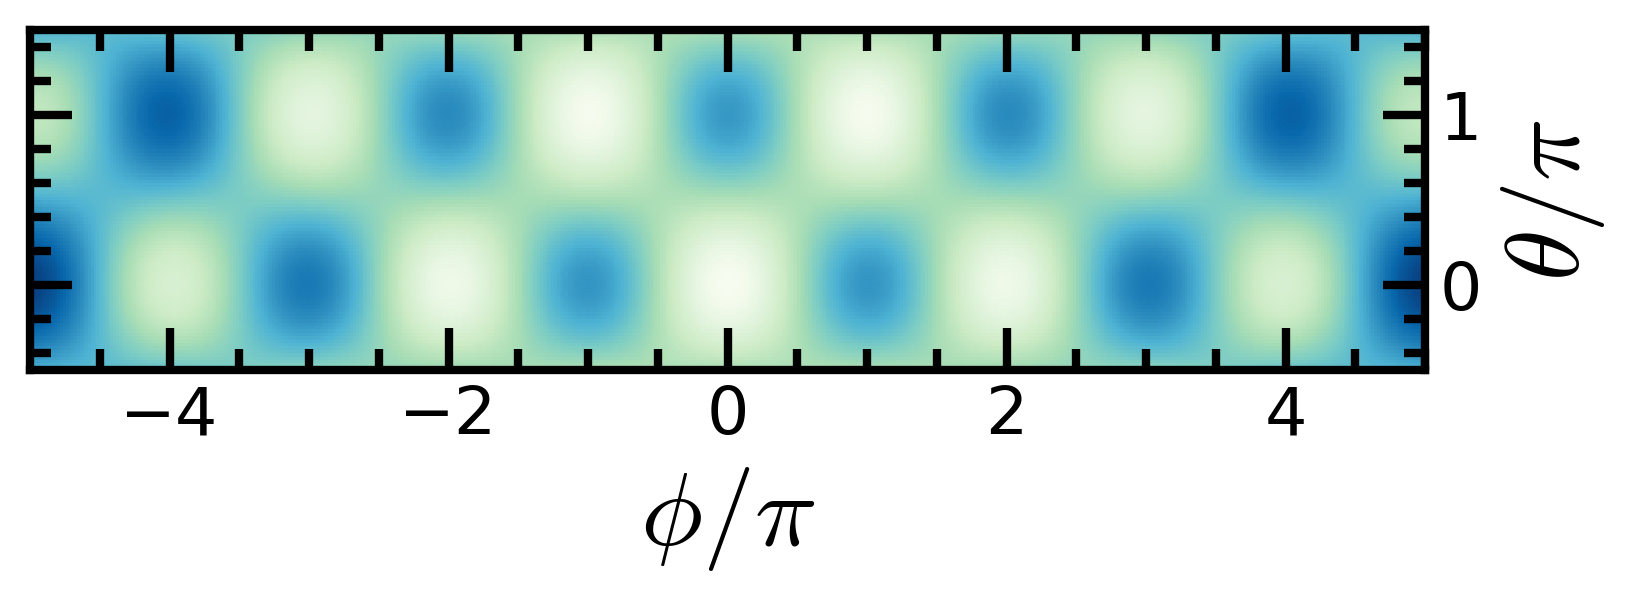

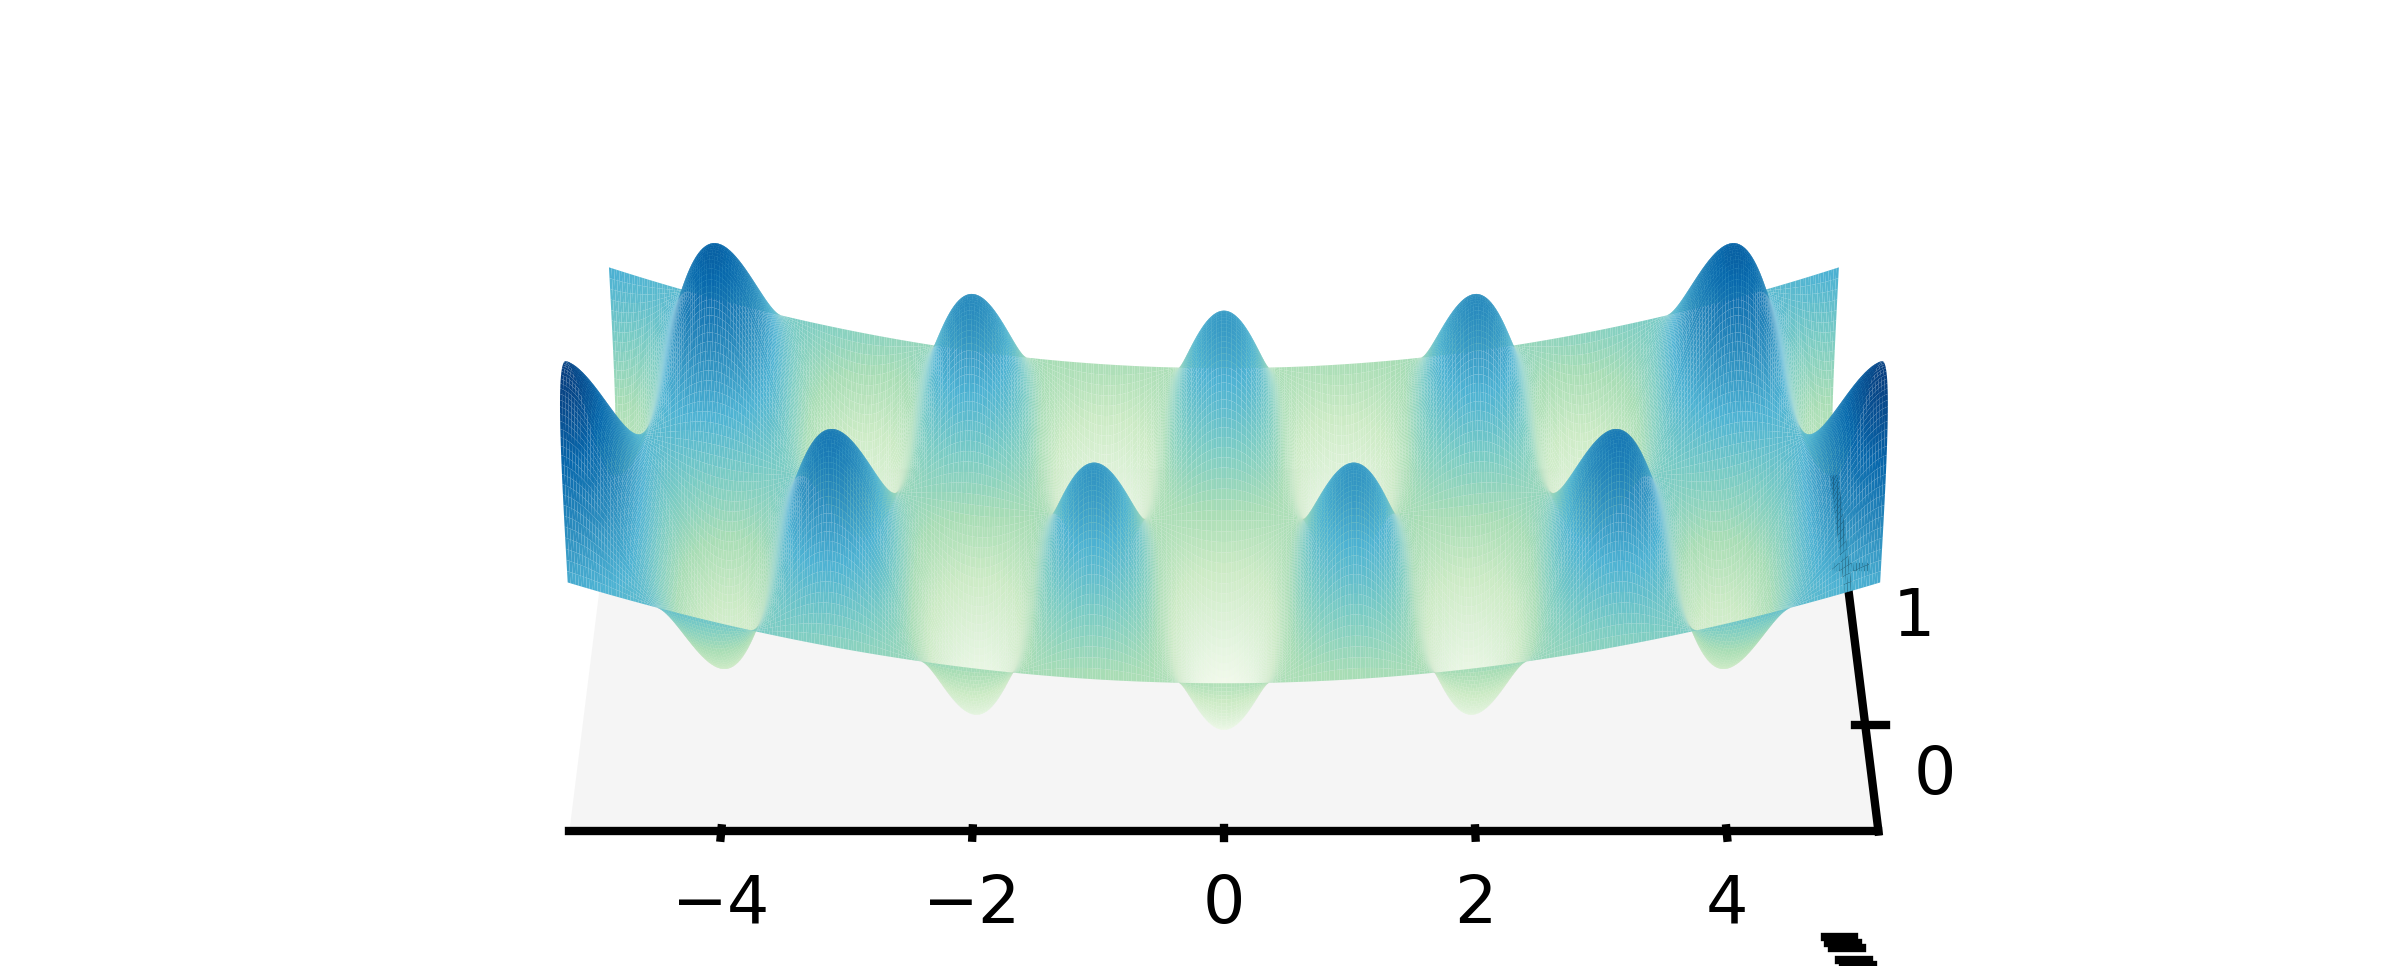

In [10]:
E_J = 15
E_L=0.1
f=plt.figure(figsize =[6,1.5])
theta_array = np.linspace(-0.5,1.5,101)*np.pi
phi_array = np.linspace(-5,5,501)*np.pi
p = np.zeros((len(theta_array), len(phi_array)))
phi_ext = 0.0
for theta_idx, theta in enumerate(theta_array):
    for phi_idx, phi in enumerate(phi_array):
        p[theta_idx, phi_idx] = potential(theta,phi,E_J,E_L,phi_ext*2*np.pi)
X, Y = np.meshgrid(phi_array/np.pi,theta_array/np.pi)
Z = p
ax = f.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_label_position('right')
plt.pcolormesh(X,Y,Z, cmap = 'GnBu')
plt.xlabel(r'$\phi/\pi$')
plt.ylabel(r'$\theta/\pi$')
plt.yticks([0,1])
plt.xticks([-4, -2,0,2,4])

fig = plt.figure(figsize = [10,4])
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap = 'GnBu', rcount = 1000, ccount = 1000,
                      shade = True)
# ax.set_xlabel(r'$\phi/\pi$')
# ax.set_ylabel(r'$\theta/\pi$')
ax.set_yticks([0,1])
ax.set_xticks([-4, -2,0,2,4])
ax.set_xlim([-5,5])
ax.set_zticks([])
ax.grid(False)

# ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis.pane.fill = False # Left pane
ax.yaxis.pane.fill = False # Right pane
ax.view_init(45, 270)

## Wave functions

In [11]:
E_C_phi      = 10
E_C_theta    = 0.12
E_J         = 10
E_L         = 0.0001
dE_J        = 0
phi_ext     = 0
ng         = 0
Ntheta = 601
Nphi = 401
dim_zp = 10

In [12]:
#Phase space first

#theta mode
theta_pts = np.linspace(-0.5,1.5,Ntheta)*np.pi
theta = diags(theta_pts, 0, shape=(Ntheta,Ntheta), format='csr', dtype='complex128')
costheta = diags(np.cos(theta_pts), 0, shape=(Ntheta,Ntheta), format='csr', dtype='complex128')
dtheta = theta_pts[-1]-theta_pts[-2]
dtheta_coeff = -1.0j/(2*dtheta)
n_theta = -1.j * diags([-dtheta_coeff, dtheta_coeff], [-1,1], shape=(Ntheta,Ntheta), format='csr', dtype='complex128')
op_costheta = tensor(Qobj(costheta), qeye(Nphi))
op_n2_theta = tensor(Qobj(n_theta**2), qeye(Nphi))

#phi mode
phi_pts = np.linspace(-5,5,Nphi)*np.pi
phi = diags(phi_pts, 0, shape=(Nphi,Nphi), format='csr', dtype='complex128')  
phi2 = diags(phi_pts**2, 0, shape=(Nphi,Nphi), format='csr', dtype='complex128')
cosphi = diags(np.cos(phi_pts), 0, shape=(Nphi,Nphi), format='csr', dtype='complex128')
dphi = phi_pts[-1]-phi_pts[-2]
dphi_coeff = -1.0j/(2*dphi)
n_phi = -1.j * diags([-dphi_coeff, dphi_coeff], [-1,1], shape=(Nphi,Nphi), format='csr', dtype='complex128')
op_phi2 = tensor(qeye(Ntheta), Qobj(phi2))
op_cosphi = tensor(qeye(Ntheta), Qobj(cosphi))
op_n2_phi = tensor(qeye(Ntheta), Qobj(n_phi**2))

#Hamiltonian, eigen vectors
H = 2*E_C_phi*op_n2_phi + 2*E_C_theta*op_n2_theta +E_L*op_phi2 - 2*E_J*op_costheta*op_cosphi
eval, evec = H.eigenstates(sparse = True, eigvals=dim_zp)

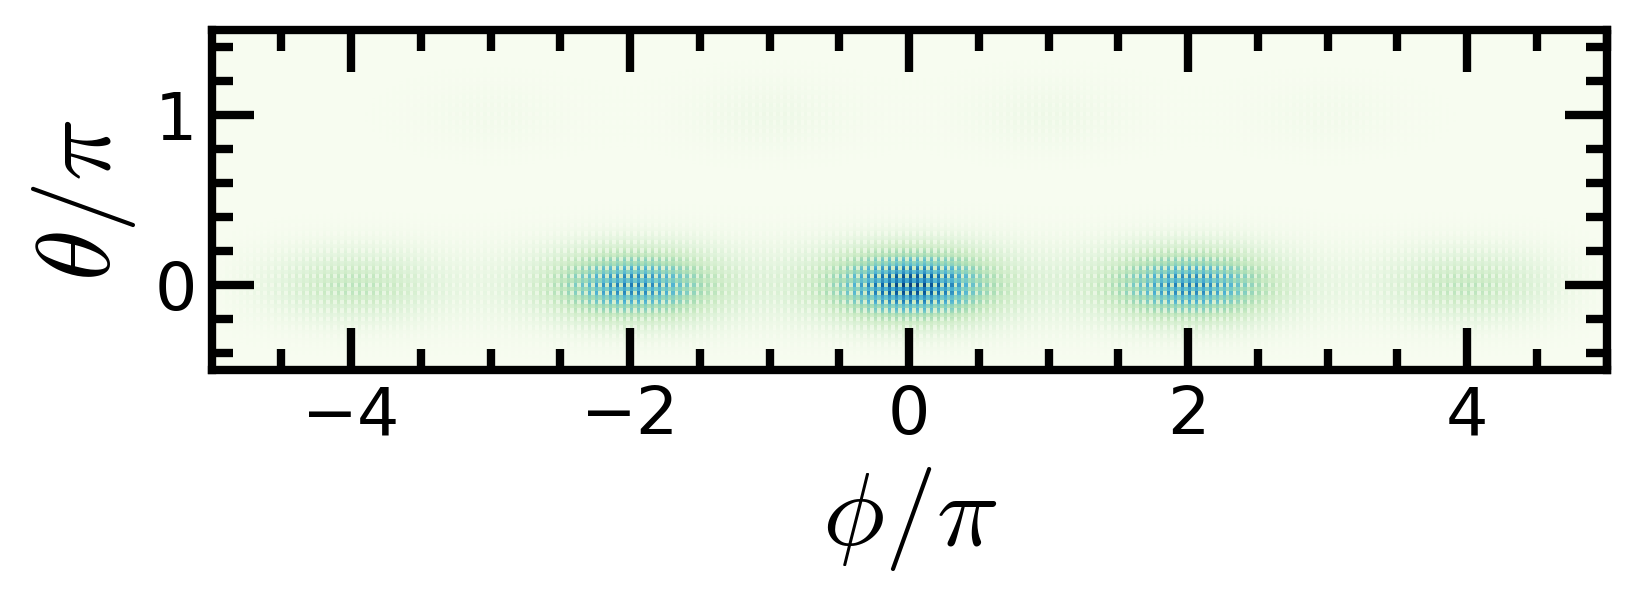

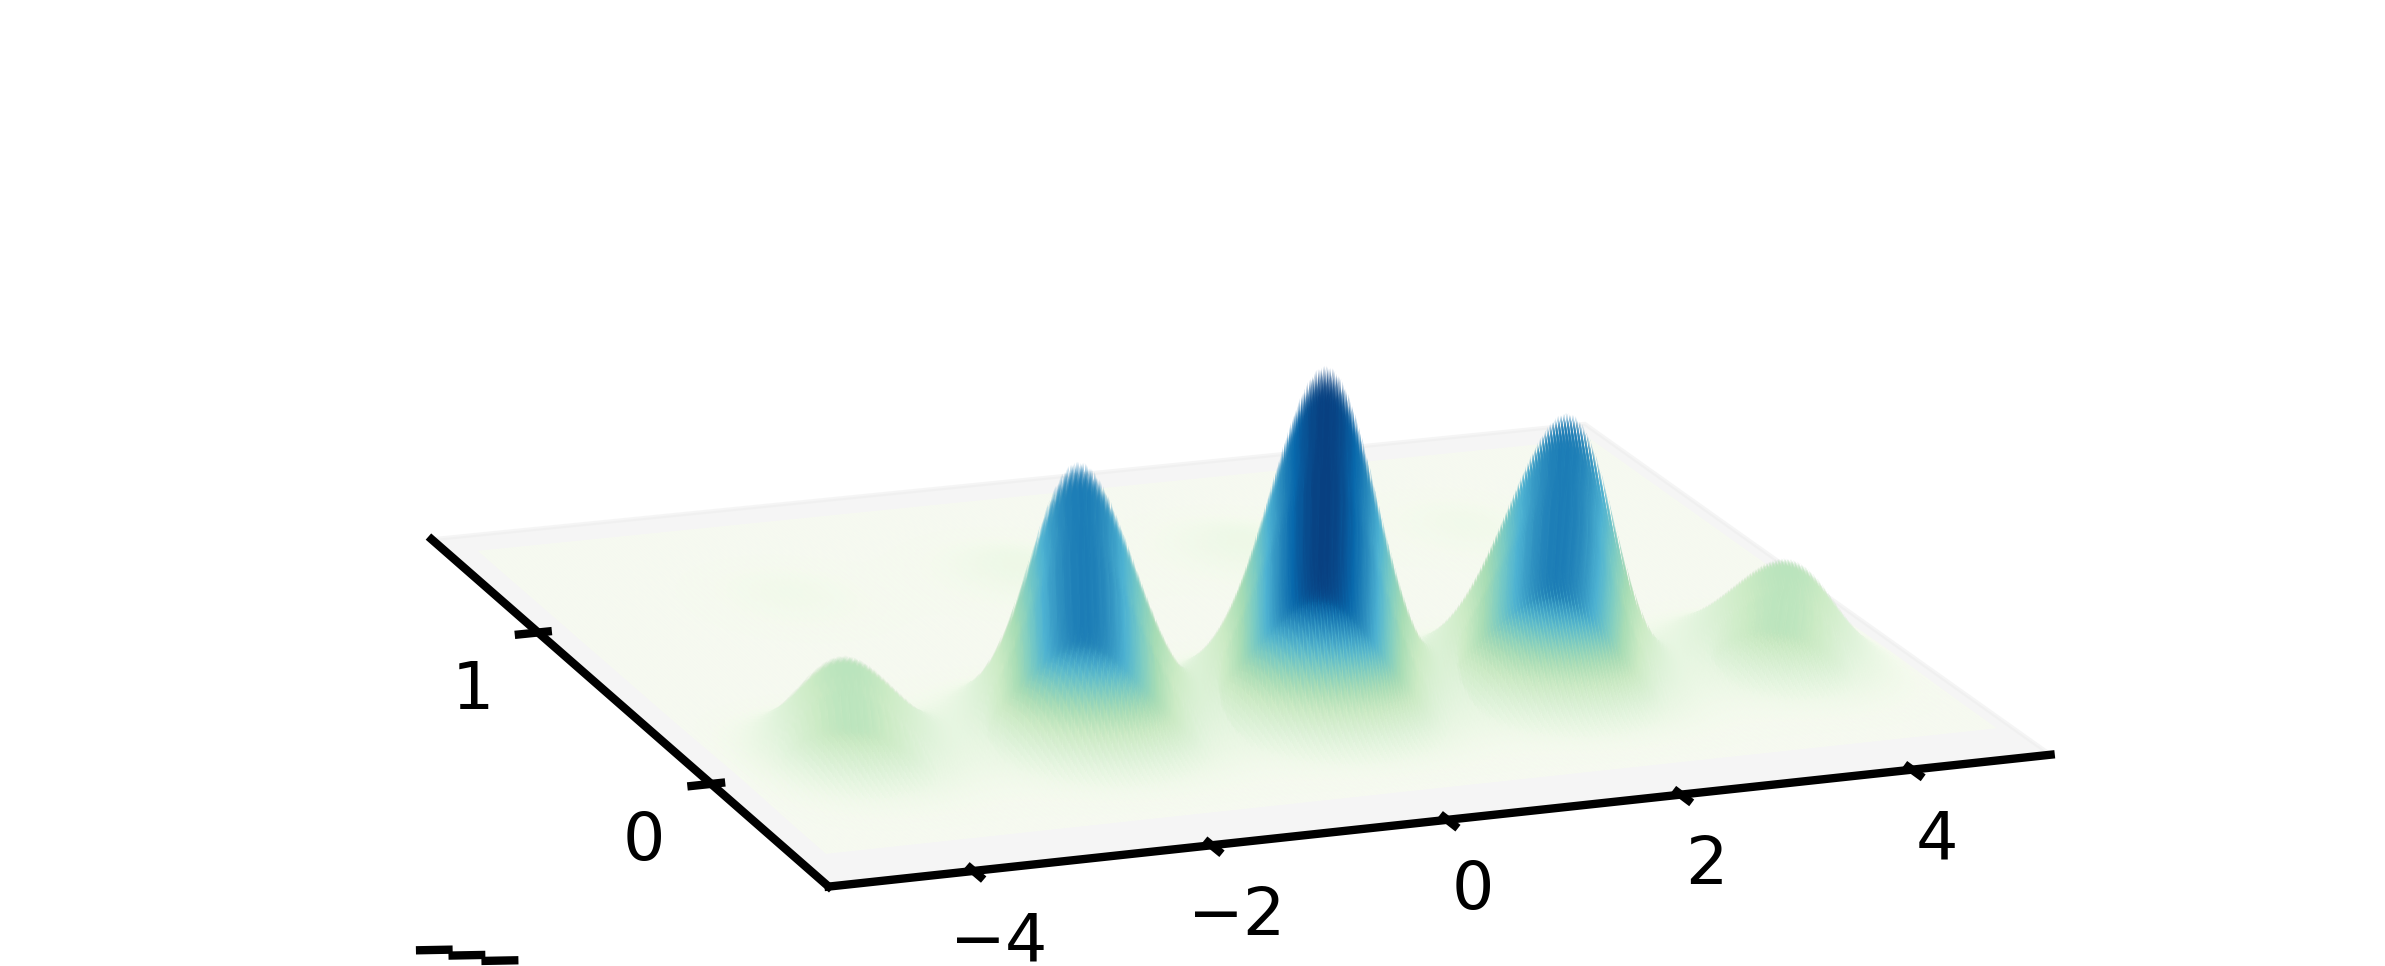

In [13]:
plt.figure(figsize =[6,1.5])
X,Y = np.meshgrid(phi_pts/np.pi,theta_pts/np.pi)
Z = abs(evec[0].full().reshape((Ntheta, Nphi)))
plt.pcolormesh(X,Y,Z, cmap = 'GnBu')
plt.xlabel(r'$\phi/\pi$')
plt.ylabel(r'$\theta/\pi$')

fig = plt.figure(figsize = [10,4])
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap = 'GnBu', rcount = 1000, ccount = 1000,
                      shade = True)
# ax.set_xlabel(r'$\phi/\pi$')
# ax.set_ylabel(r'$\theta/\pi$')
ax.set_yticks([0,1])
ax.set_xticks([-4, -2,0,2,4])
ax.set_xlim([-5,5])
ax.set_zticks([])
ax.grid(False)

# ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis.pane.fill = False # Left pane
ax.yaxis.pane.fill = False # Right pane
ax.view_init(45, 250)

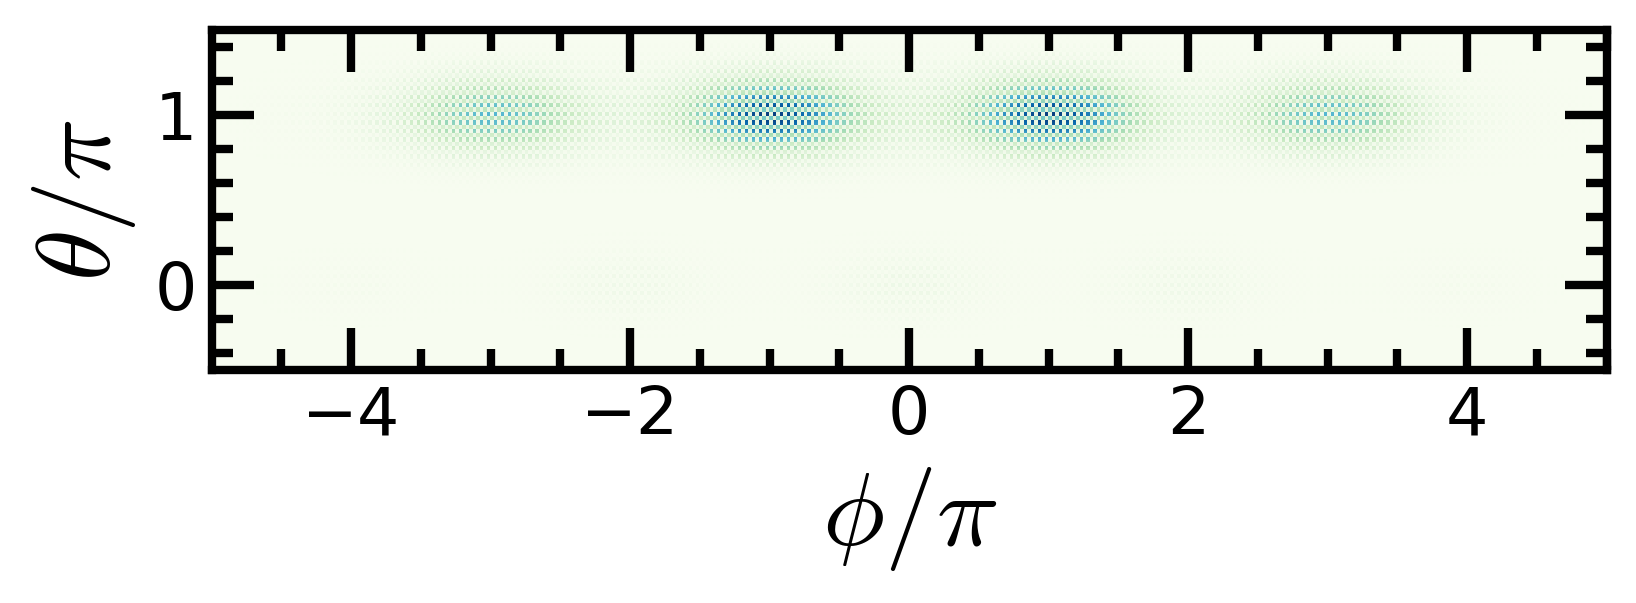

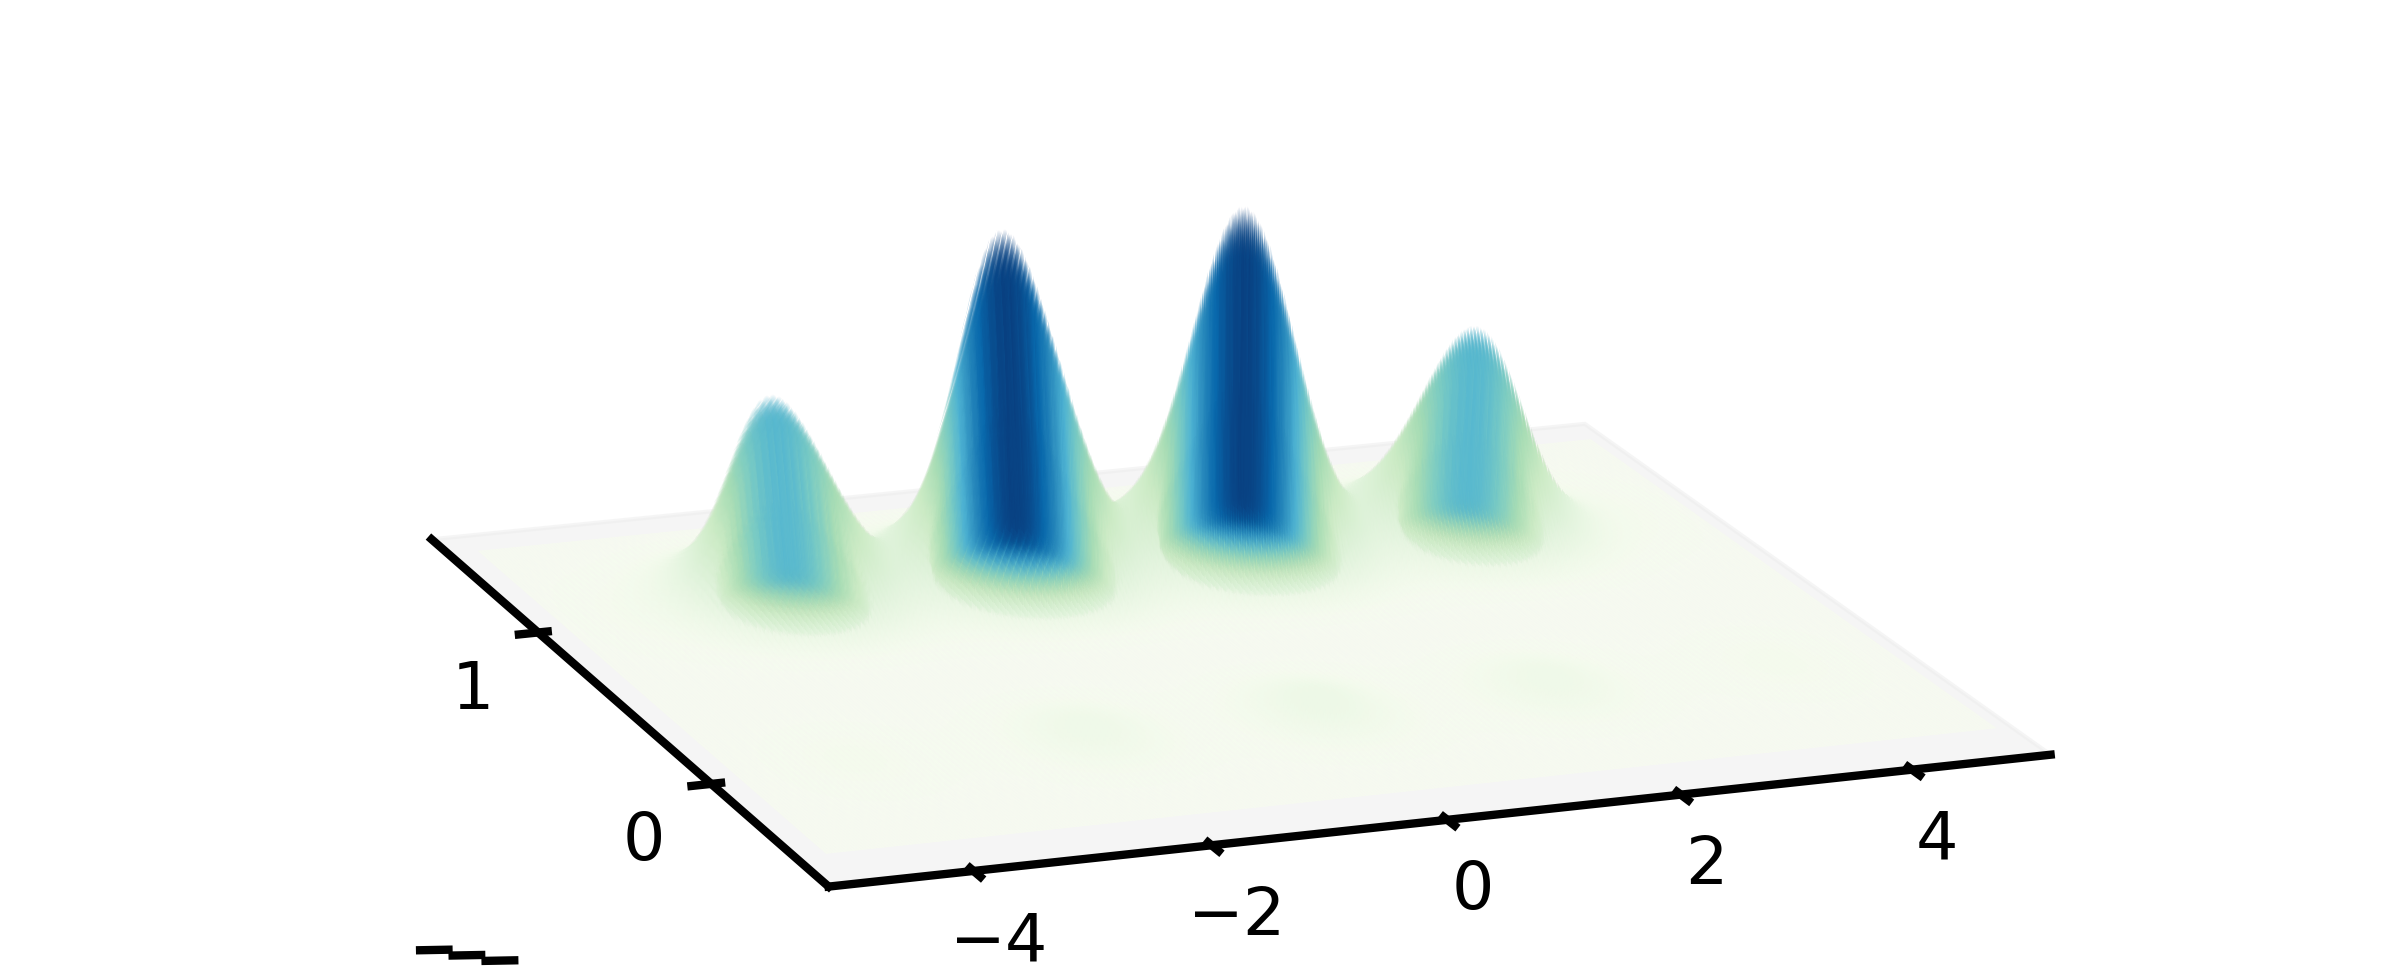

In [14]:
plt.figure(figsize =[6,1.5])
Z = abs(evec[4].full().reshape((Ntheta, Nphi)))
plt.pcolormesh(X,Y,Z, cmap = 'GnBu')
plt.xlabel(r'$\phi/\pi$')
plt.ylabel(r'$\theta/\pi$')

fig = plt.figure(figsize = [10,4])
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap = 'GnBu', rcount = 1000, ccount = 1000,
                      shade = True)
# ax.set_xlabel(r'$\phi/\pi$')
# ax.set_ylabel(r'$\theta/\pi$')
ax.set_yticks([0,1])
ax.set_xticks([-4, -2,0,2,4])
ax.set_xlim([-5,5])
ax.set_zticks([])
ax.grid(False)

# ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis.pane.fill = False # Left pane
ax.yaxis.pane.fill = False # Right pane
ax.view_init(45, 250)

In [50]:
Ntheta = 101
Nphi = 201

#Charge basis
n_theta_pts = np.linspace(-6,6,Ntheta)
n_theta = diags(n_theta_pts,shape=(Ntheta,Ntheta), format='csr', dtype='complex128')
costheta = diags([0.5,0.5], [-1,1], shape=(Ntheta,Ntheta), format='csr', dtype='complex128')
op_n2_theta = tensor(Qobj(n_theta**2), qeye(Nphi))
op_costheta = tensor(Qobj(costheta), qeye(Nphi))

#phi mode
n_phi_pts = np.linspace(-2,2,Nphi)
n_phi = diags(n_phi_pts,shape=(Nphi,Nphi), format='csr', dtype='complex128')
cosphi = diags([0.5,0.5], [-1,1], shape=(Nphi,Nphi), format='csr', dtype='complex128')
dnphi = n_phi_pts[-1]-n_phi_pts[-2]
dnphi_coeff = 1/(2*dnphi)
phi = 1.j * diags([-dnphi_coeff, dnphi_coeff], [-1,1], shape=(Nphi,Nphi), format='csr', dtype='complex128')
phi2 = phi**2

op_phi2 = tensor(qeye(Ntheta), Qobj(phi2))
op_cosphi = tensor(qeye(Ntheta), Qobj(cosphi))
op_n2_phi = tensor(qeye(Ntheta), Qobj(n_phi**2))

#Hamiltonian, eigen vectors
H = 2*E_C_phi*op_n2_phi + 2*E_C_theta*op_n2_theta +E_L*op_phi2 - 2*E_J*op_costheta*op_cosphi
eval, evec = H.eigenstates(sparse = True, eigvals=dim_zp)

Text(0.5, 0, '$n_\\theta$')

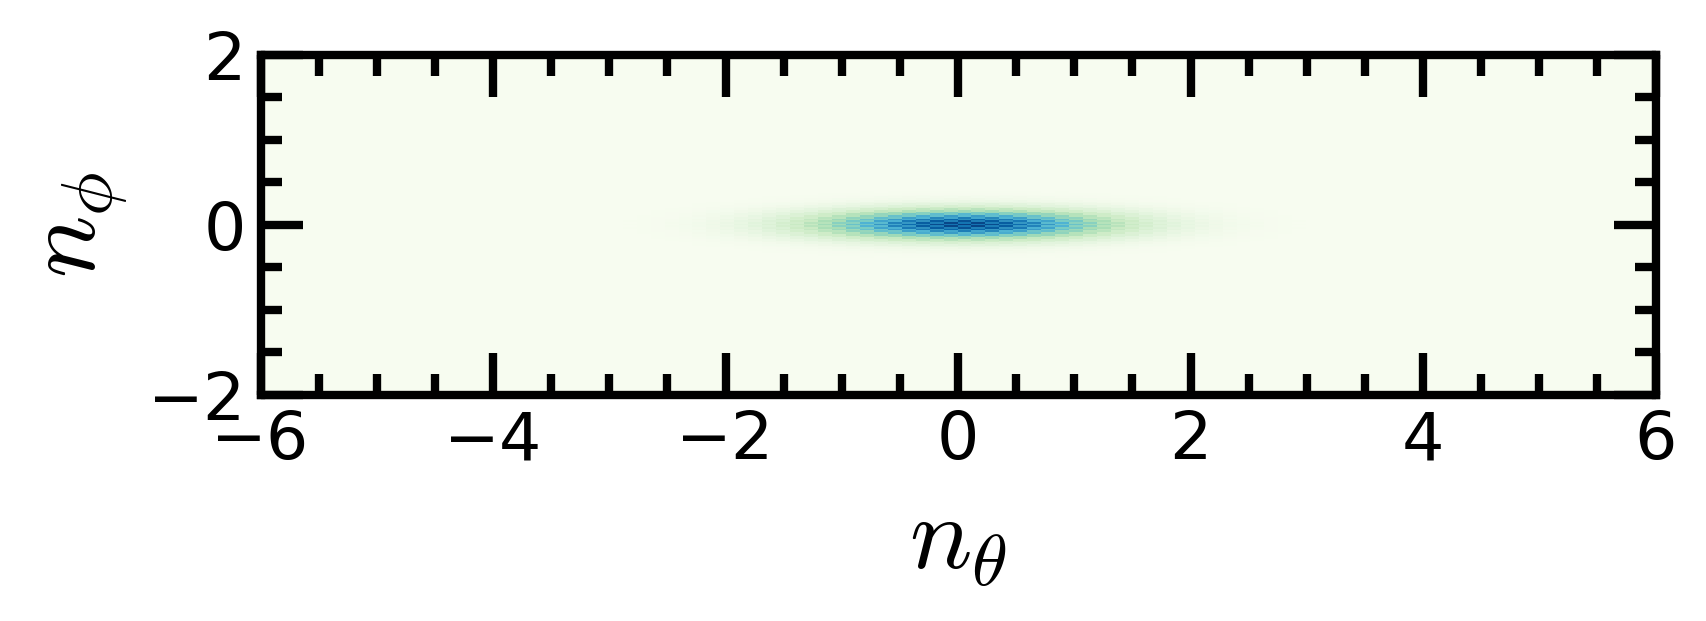

In [53]:
plt.figure(figsize =[6,1.5])
X,Y = np.meshgrid(n_theta_pts,n_phi_pts)
Z = abs(evec[1].full().reshape((Ntheta, Nphi))).transpose()
plt.pcolormesh(X,Y,Z, cmap = 'GnBu')
plt.ylabel(r'$n_\phi$')
plt.xlabel(r'$n_\theta$')